### Importing Libraries for Time Series forecasting ###
***


In [1]:
#Reading the data
import numpy as np
import pandas as pd
# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#SARIMA modeling
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima   


#Performance evaluation
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

#Warnings
import warnings
warnings.filterwarnings("ignore")
from DateTime import DateTime

### Reading the data ###
***
- For this first step, we are going to work with the data of several oil companies that are in the American stock market

In [2]:
df = pd.read_csv("/Users/me/Desktop/ML_ExxonMobile_Forecast/src/data/oil and gas stock prices.csv")


### Selection of Data ##
***
- Choosing only Exxon Mobile values 

In [3]:
df= df.loc[df.Symbol=="XOM"]


### Passing the information to DateTime ###
***


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

### Visualization of the Dataframe with all their variables ###
***

In [5]:
df.head(10)

,Date,Symbol,Open,High,Low,Close,Volume,Currency
0,2000-01-03,XOM,39.75,40.38,38.94,39.16,13458200,USD
1,2000-01-04,XOM,38.69,39.09,38.25,38.41,14510800,USD
2,2000-01-05,XOM,39.00,40.88,38.91,40.50,17485000,USD
3,2000-01-06,XOM,40.31,42.91,40.09,42.59,19462000,USD
4,2000-01-07,XOM,42.97,43.12,42.00,42.47,16603800,USD
5,2000-01-10,XOM,42.09,42.31,41.78,41.88,8545400,USD
6,2000-01-11,XOM,41.88,42.62,41.81,42.00,8731600,USD
7,2000-01-12,XOM,41.62,42.19,41.41,41.75,10314400,USD
8,2000-01-13,XOM,41.75,43.00,41.56,42.72,12056000,USD
9,2000-01-14,XOM,42.75,42.75,41.50,41.88,11268800,USD


In [6]:
df = df.set_index("Date")

### Getting the frequency to Daily ###
***
---

In [7]:
freq = pd.infer_freq(df.index)#infer frequency of the data
df.index.freq = freq#set frequency of the data
ts_resampled =df.asfreq('D')#resample the data to daily frequency
ts_resampled#print the resampled data

,Symbol,Open,High,Low,Close,Volume,Currency
Date,,,,,,,
2000-01-03,XOM,39.75,40.38,38.94,39.16,13458200.0,USD
2000-01-04,XOM,38.69,39.09,38.25,38.41,14510800.0,USD
2000-01-05,XOM,39.00,40.88,38.91,40.50,17485000.0,USD
2000-01-06,XOM,40.31,42.91,40.09,42.59,19462000.0,USD
2000-01-07,XOM,42.97,43.12,42.00,42.47,16603800.0,USD
...,...,...,...,...,...,...,...
2022-06-06,XOM,99.18,99.78,98.67,98.84,20682050.0,USD
2022-06-07,XOM,99.70,103.43,99.49,103.37,36994384.0,USD
2022-06-08,XOM,103.49,105.57,102.98,104.59,31442508.0,USD


### Interpolation
***
- Filling all the NAN values with the "Forward fill" function


In [8]:
ts_resampled = ts_resampled.fillna(method='ffill')


In [9]:
ts_resampled.head(15)

,Symbol,Open,High,Low,Close,Volume,Currency
Date,,,,,,,
2000-01-03,XOM,39.75,40.38,38.94,39.16,13458200.0,USD
2000-01-04,XOM,38.69,39.09,38.25,38.41,14510800.0,USD
2000-01-05,XOM,39.00,40.88,38.91,40.50,17485000.0,USD
2000-01-06,XOM,40.31,42.91,40.09,42.59,19462000.0,USD
2000-01-07,XOM,42.97,43.12,42.00,42.47,16603800.0,USD
2000-01-08,XOM,42.97,43.12,42.00,42.47,16603800.0,USD
2000-01-09,XOM,42.97,43.12,42.00,42.47,16603800.0,USD
2000-01-10,XOM,42.09,42.31,41.78,41.88,8545400.0,USD
2000-01-11,XOM,41.88,42.62,41.81,42.00,8731600.0,USD


In [10]:
df= ts_resampled.copy()

### Visualization of the Closing value on the Dataframe ###
***


<Axes: xlabel='Date'>

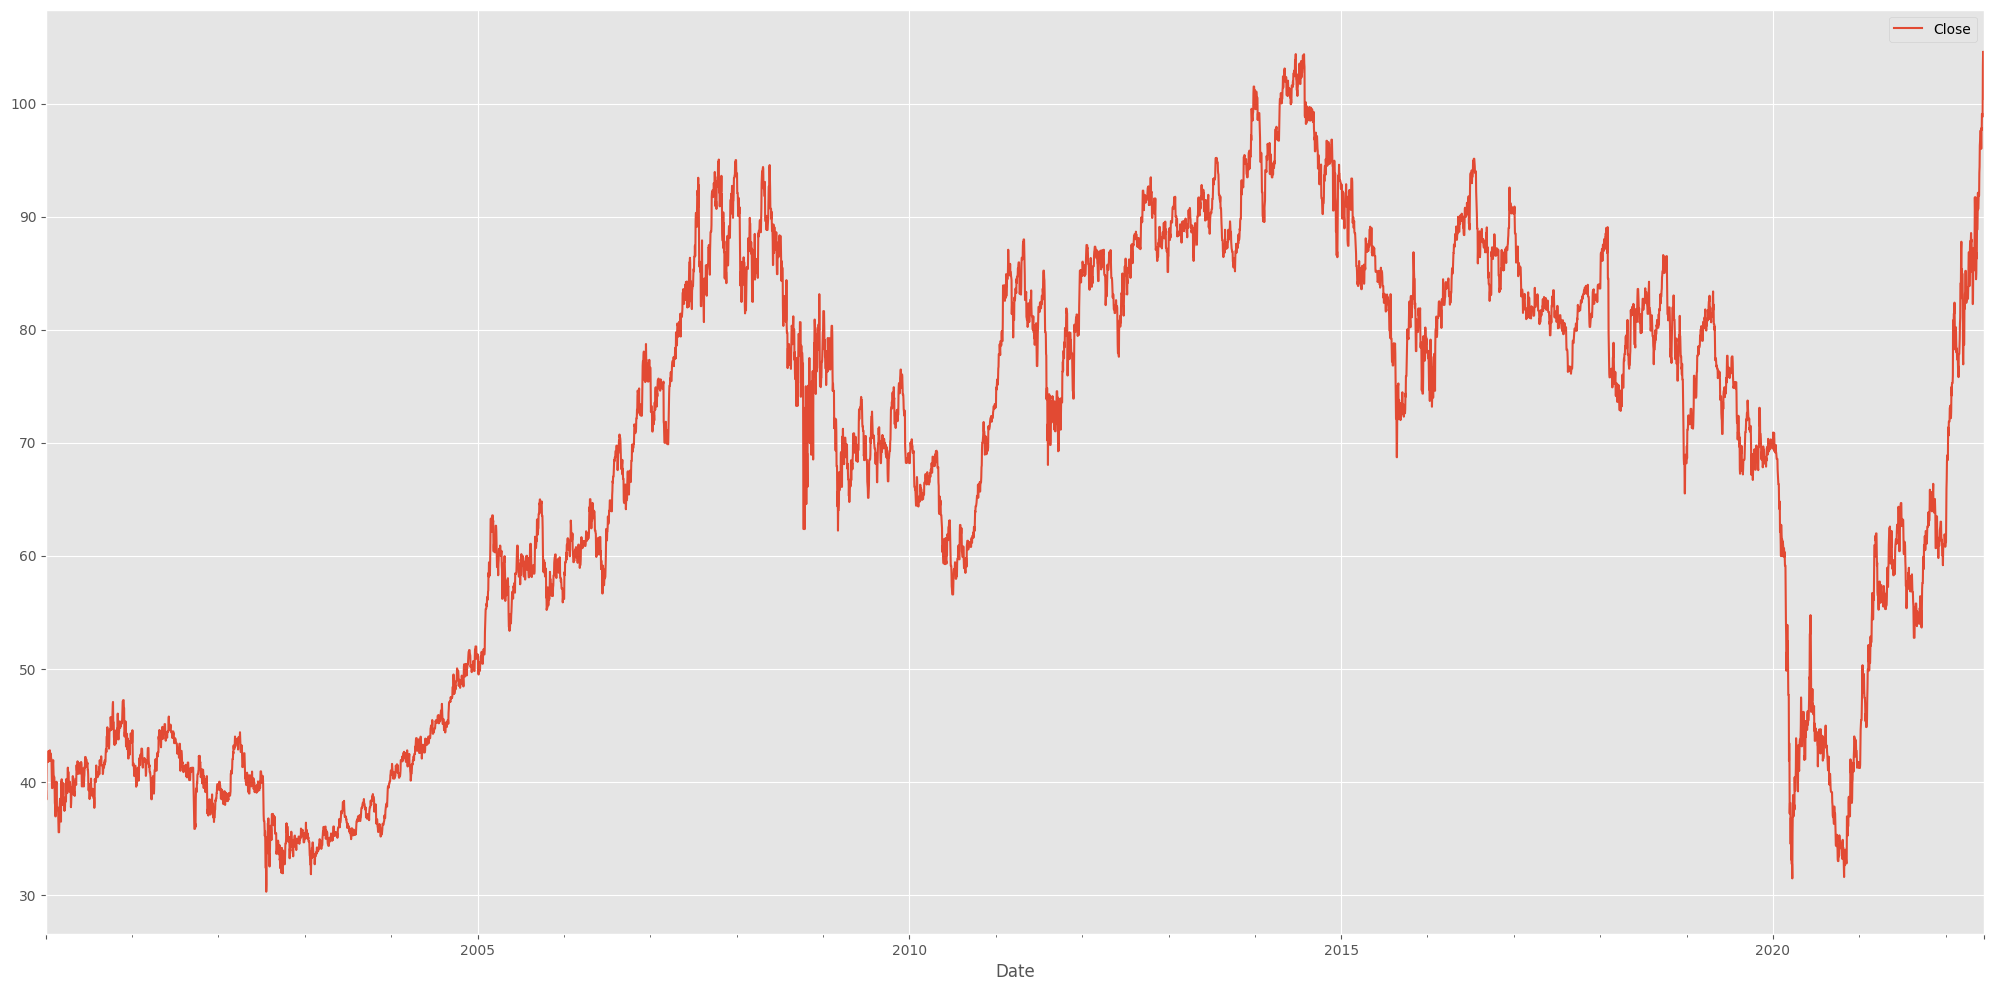

In [11]:
df["Close"].plot(figsize=(25,12),legend=True)

In [12]:
print('Time period start: {}\nTime period end: {}'.format(df.index.min(),df.index.max()))

Time period start: 2000-01-03 00:00:00
Time period end: 2022-06-10 00:00:00


### Renaming the Close to Value ###
***
---

In [13]:
df= df[["Close"]].copy()
df.rename(columns={"Close":"Value"},inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8195 entries, 2000-01-03 to 2022-06-10
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   8195 non-null   float64
dtypes: float64(1)
memory usage: 128.0 KB


# Feature engineering for Box-plots and data exploration
***

In [15]:
def feature_engineering(df):
    df['Date'] = df.index
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['Dayofweek'] = df['Date'].dt.dayofweek
    return df

feature_engineering(df)

,Value,Date,Year,Month,Day,Dayofweek
Date,,,,,,
2000-01-03,39.16,2000-01-03,2000,1,3,0
2000-01-04,38.41,2000-01-04,2000,1,4,1
2000-01-05,40.50,2000-01-05,2000,1,5,2
2000-01-06,42.59,2000-01-06,2000,1,6,3
2000-01-07,42.47,2000-01-07,2000,1,7,4
...,...,...,...,...,...,...
2022-06-06,98.84,2022-06-06,2022,6,6,0
2022-06-07,103.37,2022-06-07,2022,6,7,1
2022-06-08,104.59,2022-06-08,2022,6,8,2


__Box and Whisker Plots:__
- Median values across years are not providing a lot of information
- Steady increase in the spread, or middle 50% of the data (boxes) over time
- A model considering seasonality might work well

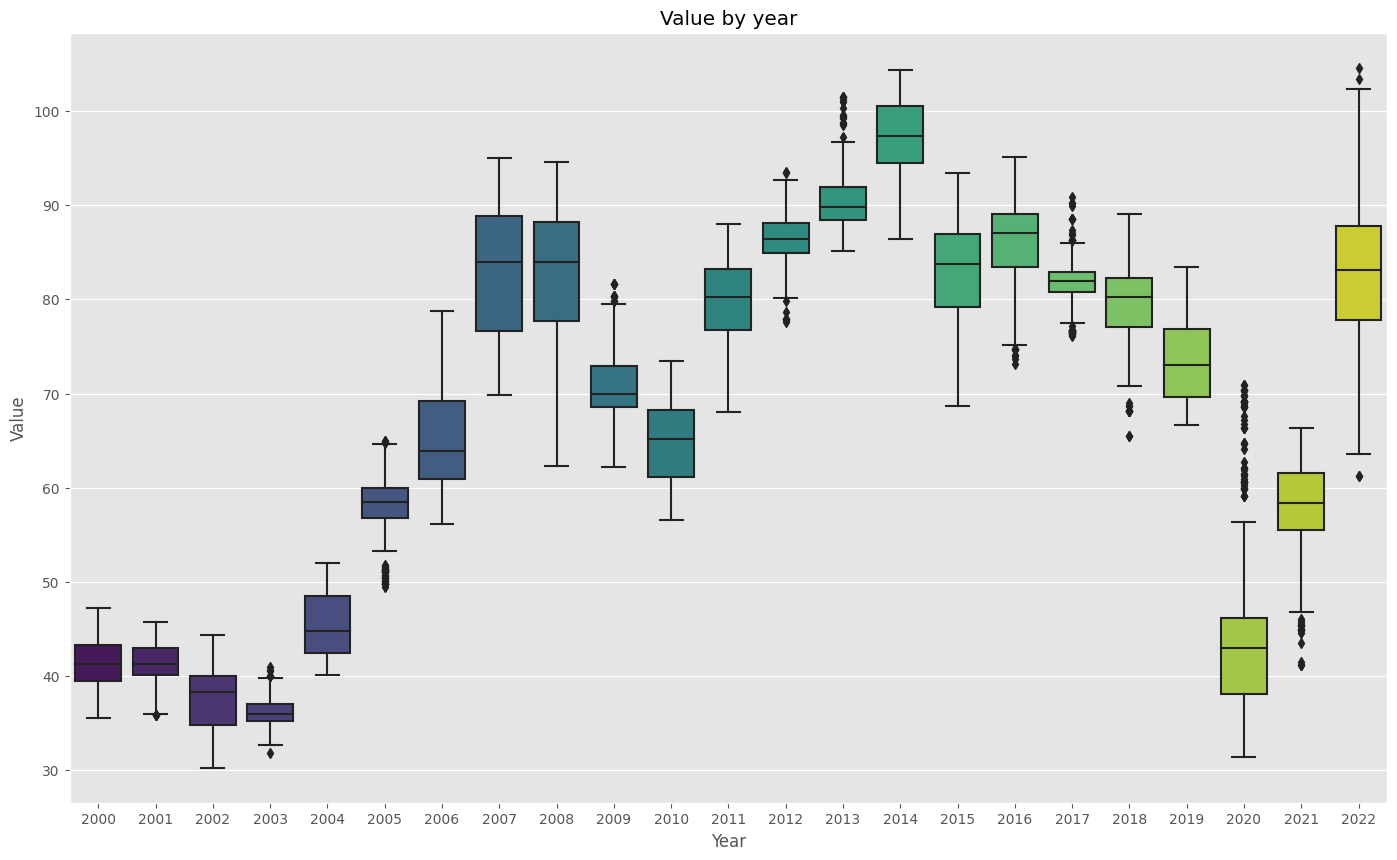

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(17, 10))
sns.boxplot(data=df, x="Year", y='Value', palette='viridis', ax=ax)
ax.set_title('Value by year')
plt.show()

__Decomposing using statsmodel:__
- We can use statsmodels to perform a decomposition of this time series. 
- The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns. 
- With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

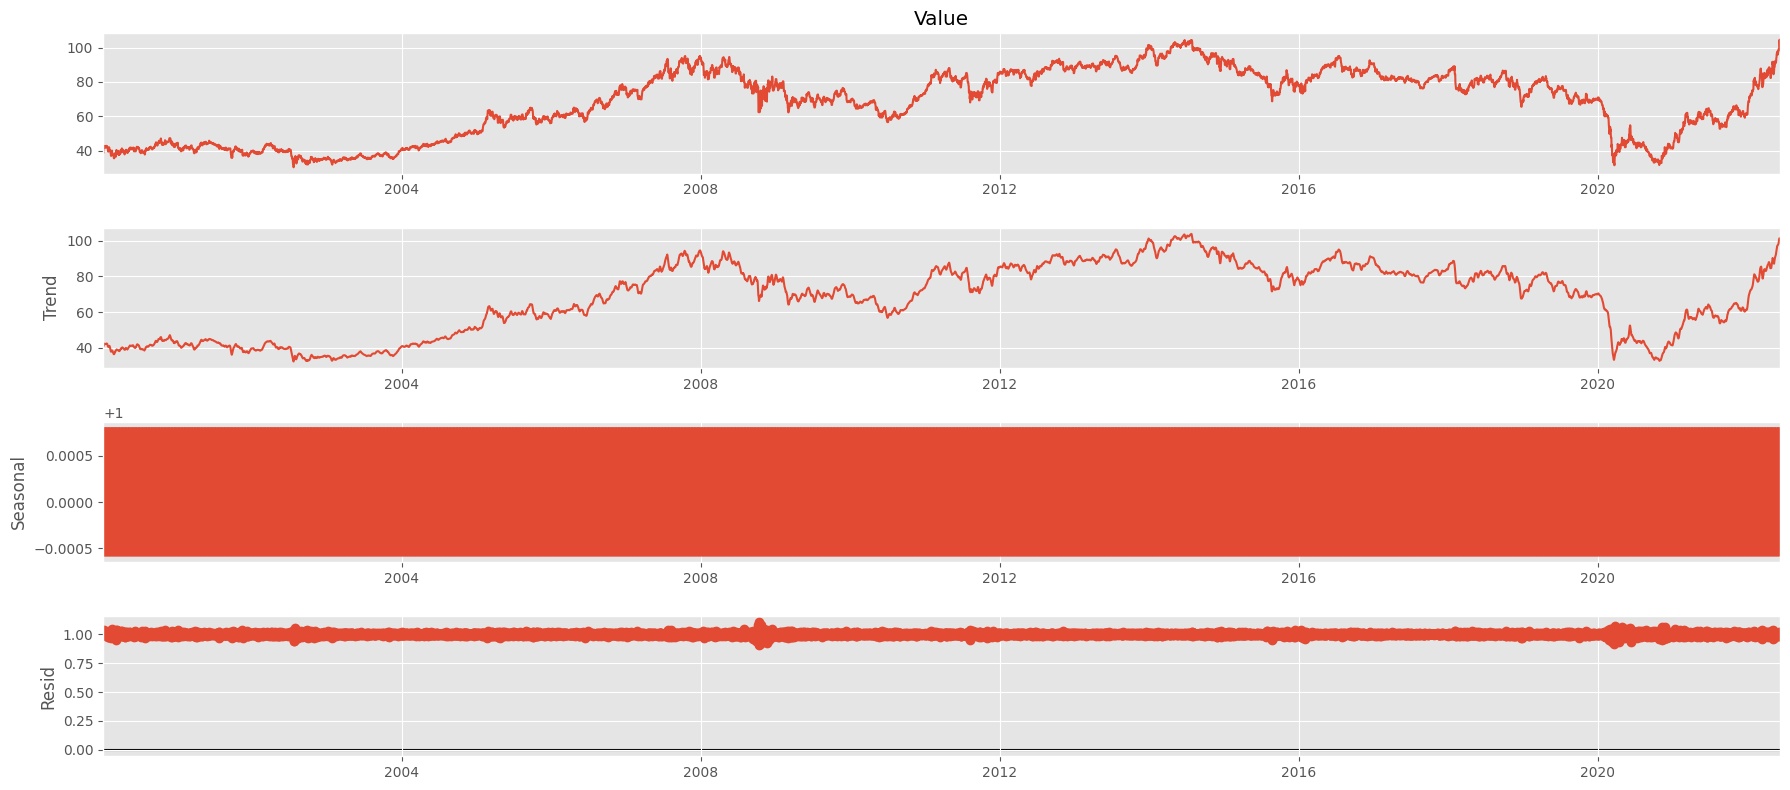

In [17]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df["Value"], model='multiplicative')
fig = decomposition.plot()
plt.show()

## Stationarity
- A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
- Most of the Time Series models work on the assumption that the TS is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.
- Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future. 
- Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

***
---

__We can check stationarity using the following:__

- __ACF and PACF plots__: If the time series is stationary, the ACF/PACF plots will show a __quick drop-off in correlation__ after a small amount of lag between points.
- __Plotting Rolling Statistics__: We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.
- __Augmented Dickey-Fuller Test:__ This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

***
___

### ACF and PACF plots

- Let's review the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots
- If the time series is stationary, the ACF/PACF plots will show a __quick drop-off in correlation__ after a small amount of lag between points.
- This data is non-stationary as a high number of previous observations are correlated with future values.
- Confidence intervals are drawn as a cone. 
- By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
- The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

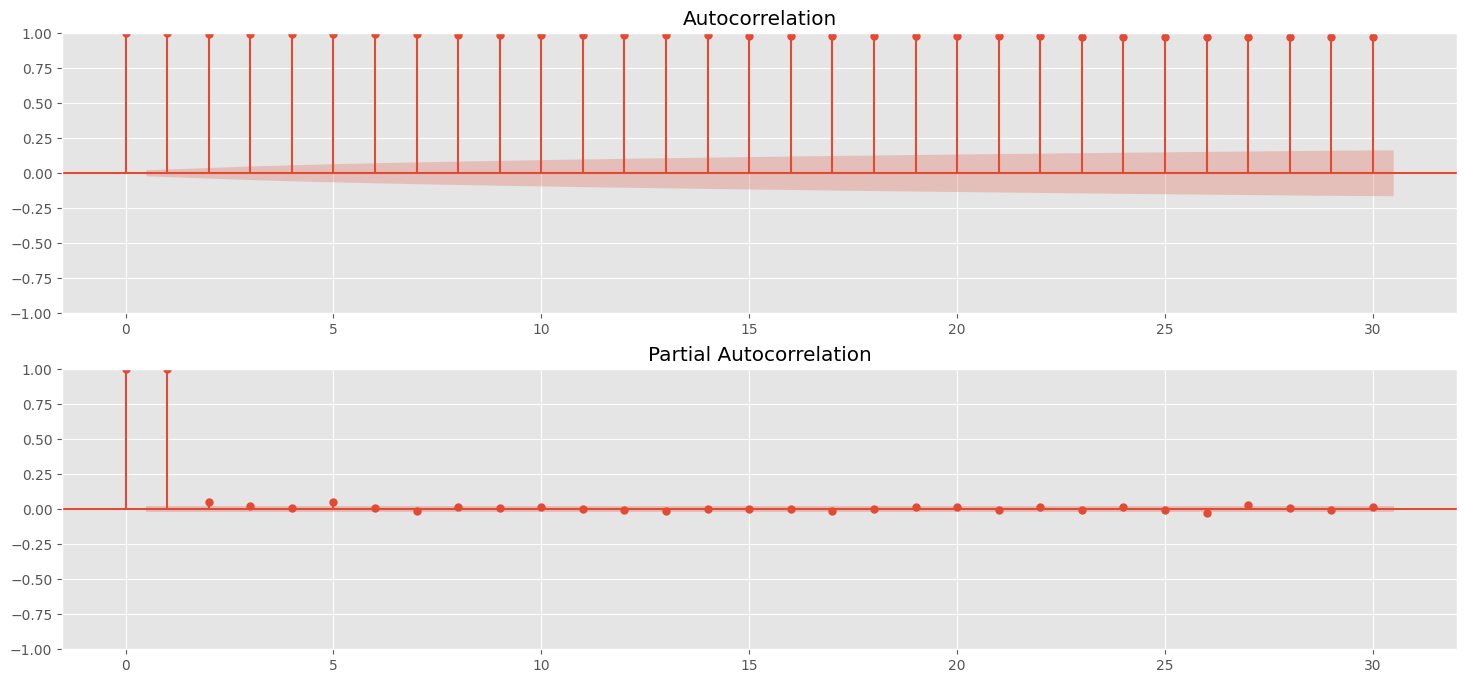

In [18]:
from matplotlib import pyplot

pyplot.figure()
pyplot.subplot(211)
plot_acf(df["Value"], ax=pyplot.gca(), lags = 30)
pyplot.subplot(212)
plot_pacf(df["Value"], ax=pyplot.gca(), lags = 30)
pyplot.show()

In [19]:
df= df[["Value"]].copy()

__Reviewing plots of the density of observations can provide further insight into the structure of the data:__
- The distribution is not perfectly Gaussian (normal distribution).
- The distribution is right shifted.
- Transformations might be useful prior to modelling.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8195 entries, 2000-01-03 to 2022-06-10
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   8195 non-null   float64
dtypes: float64(1)
memory usage: 128.0 KB


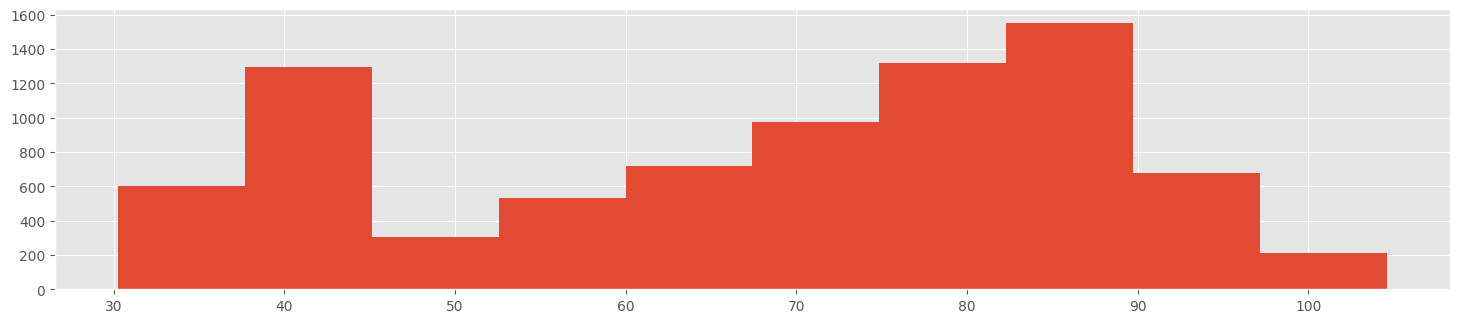

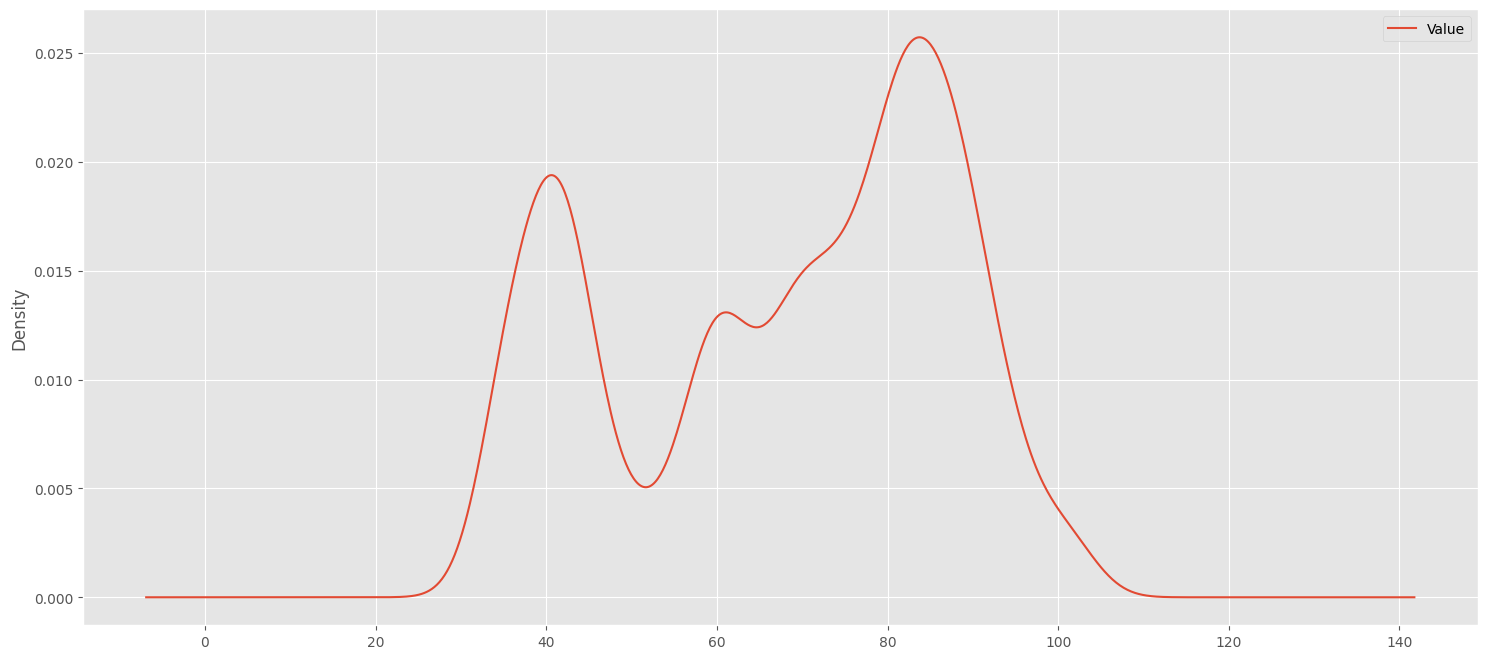

,Value
count,8195.000000
mean,67.955834
std,19.417915
min,30.270000
25%,48.260000
50%,72.130000
75%,84.025000
max,104.590000


In [21]:
from matplotlib import pyplot

pyplot.figure(1)
pyplot.subplot(211)
df.Value.hist()
df.plot(kind='kde')
pyplot.show()
df.describe()

### Rolling Mean & Dickey-Fuller test ###
***
- We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)
- The time series is hence not stationary

## Making Time Series Stationary
There are 2 major reasons behind non-stationarity of a TS:

1. __Trend__ – varying mean over time. 
2. __Seasonality__ – variations at specific time-frames. 

In [22]:
start_date = pd.to_datetime('2018-01-01')  # Specify the start date of the 4-year period

df = df.loc[df.index >= start_date]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1622 entries, 2018-01-01 to 2022-06-10
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1622 non-null   float64
dtypes: float64(1)
memory usage: 25.3 KB


### Train & test ###
***


In [24]:
train_data =df[:len(df)-324]
test_data =df[len(df)-324:]

In [25]:
train_data

,Value
Date,
2018-01-01,83.64
2018-01-02,85.03
2018-01-03,86.70
2018-01-04,86.82
2018-01-05,86.75
...,...
2021-07-17,57.32
2021-07-18,57.32
2021-07-19,55.35


# Seasonal-Arima #
- let`s begin with Auto-Arima to see the best hiper-parameters

In [26]:
modelo_auto=auto_arima(train_data,start_p=0,d=1,start_q=0,
          max_p=4,max_d=2,max_q=4, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=1,
          max_Q=2, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)
print(modelo_auto)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4427.743, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4061.193, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.47 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4424.161, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3917.566, Time=0.92 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=17.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=5.80 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3916.709, Time=0.72 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4061.633, Time=0.28 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=8.80 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=4.62 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3917.657, Time=0.89 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3919.023, Time=1.91 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=3918.680, Time=2.78 sec

Best model:  ARIMA(0,1,0)(2,1,0)[12]      

In [27]:
arima_model = SARIMAX(train_data, order = (0,1,0), seasonal_order = (2,1,0,12)) 
arima_result = arima_model.fit() 
arima_result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50653D+00    |proj g|=  1.60784D-02


 This problem is unconstrained.



At iterate    5    f=  1.50644D+00    |proj g|=  2.24492D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   2.245D-06   1.506D+00
  F =   1.5064364692222949     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                 1298
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1955.355
Date:                            Thu, 01 Jun 2023   AIC                           3916.709
Time:                                    16:53:50   BIC                           3932.185
Sample:                                01-01-2018   HQIC                          3922.519
                                     - 07-21-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6682      0.021    -32.293      0.000      -0.709      -0.628
ar.S.L24      -0.3347      0.020    -16.777      0.000      -0.374      -0.296
sigma2         1.2221      0.029     42.104      0.000       1.165       1.279
===================================================================================
Ljung-Box (L1) (Q):                   1.11   Jarque-Bera (JB):               664.24
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             0.05
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
arima_pred2 = arima_result.predict(900)

In [29]:
start_date = pd.to_datetime('2020-06-19') 
end_date = pd.to_datetime('2021-07-21')  

filtered_df = df.loc[(df.index >= start_date) & (df.index <= end_date)]

mf= filtered_df[["Value"]]

In [30]:
mf

,Value
Date,
2020-06-19,45.98
2020-06-20,45.98
2020-06-21,45.98
2020-06-22,46.42
2020-06-23,46.70
...,...
2021-07-17,57.32
2021-07-18,57.32
2021-07-19,55.35


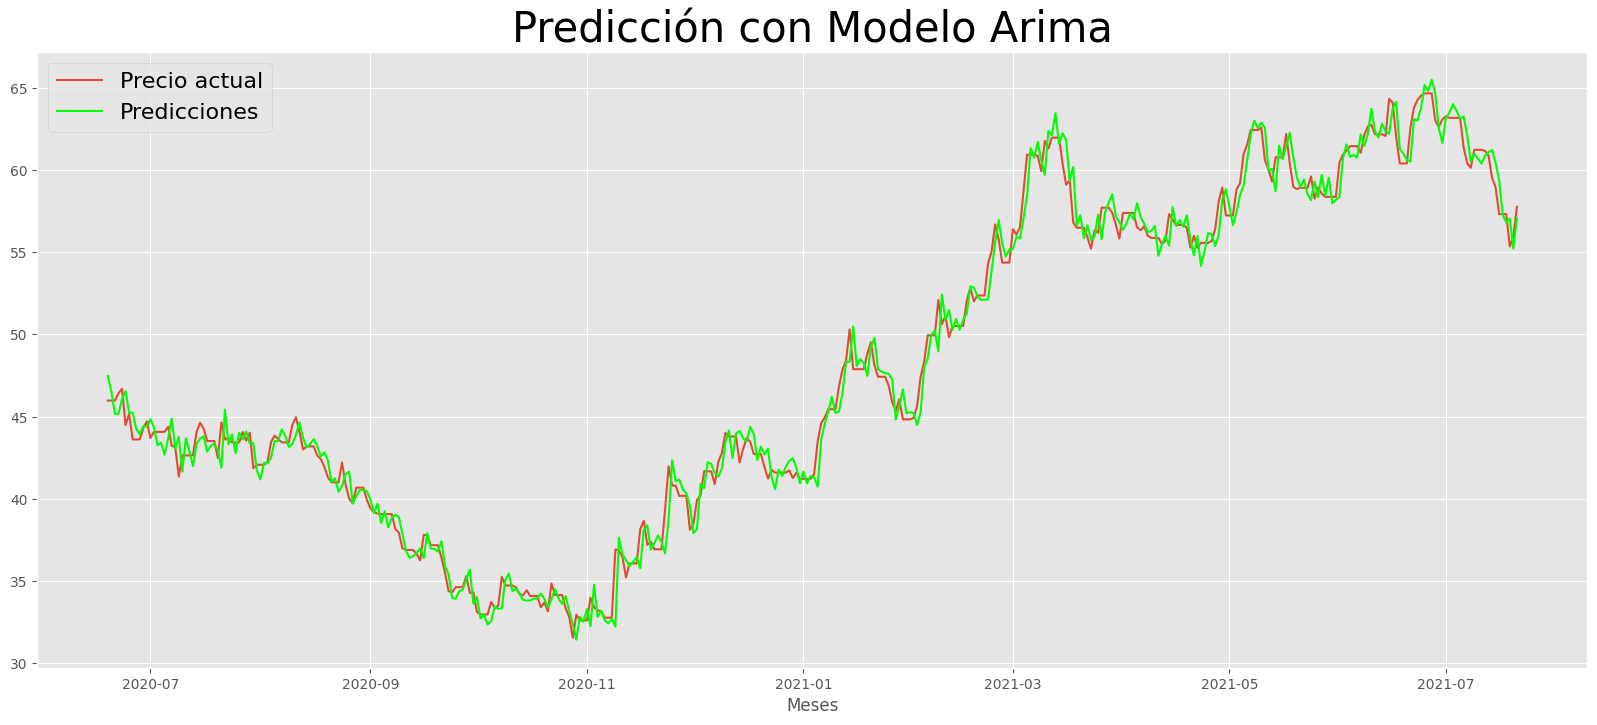

In [31]:
plt.rcParams["figure.figsize"] = (20, 8)

plt.plot(mf["Value"], label="Precio actual")
plt.plot(arima_pred2, color="lime", label="Predicciones")
plt.title("Predicción con Modelo Arima", fontsize=30);
plt.xlabel('Meses')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

In [32]:
def evaluacion_metrica(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [33]:
evaluacion_metrica(mf,arima_pred2)

Evaluation metric results:-
MSE is : 1.0289050010972527
MAE is : 0.7640231978196933
RMSE is : 1.0143495458160627
MAPE is : 24.237161859077926
R2 is : 0.9891263086407038



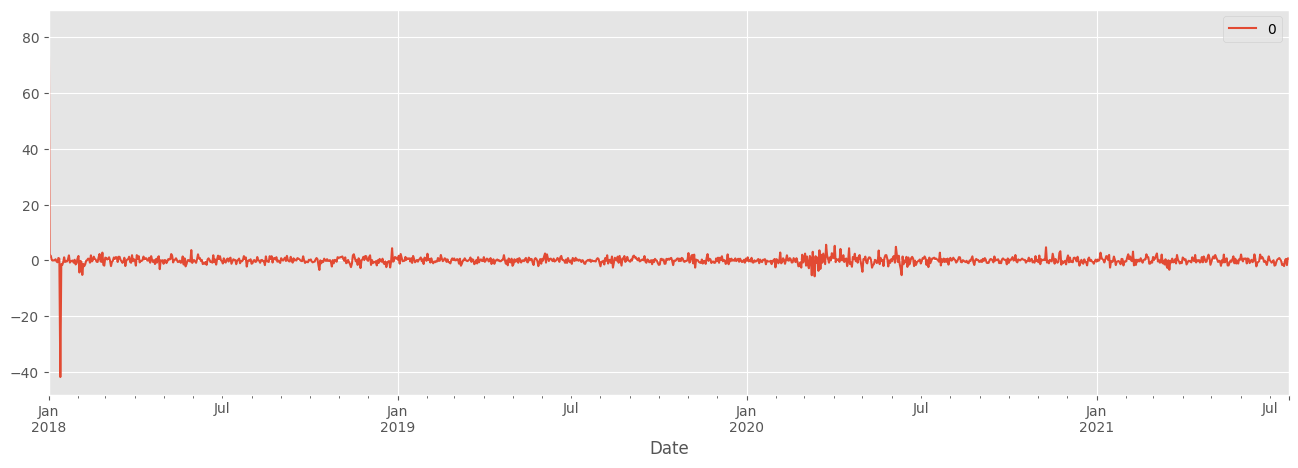

In [34]:
# Gráfico de línea de errores residuales
residuals = pd.DataFrame(arima_result.resid)
residuals.plot(figsize = (16,5));
plt.show();

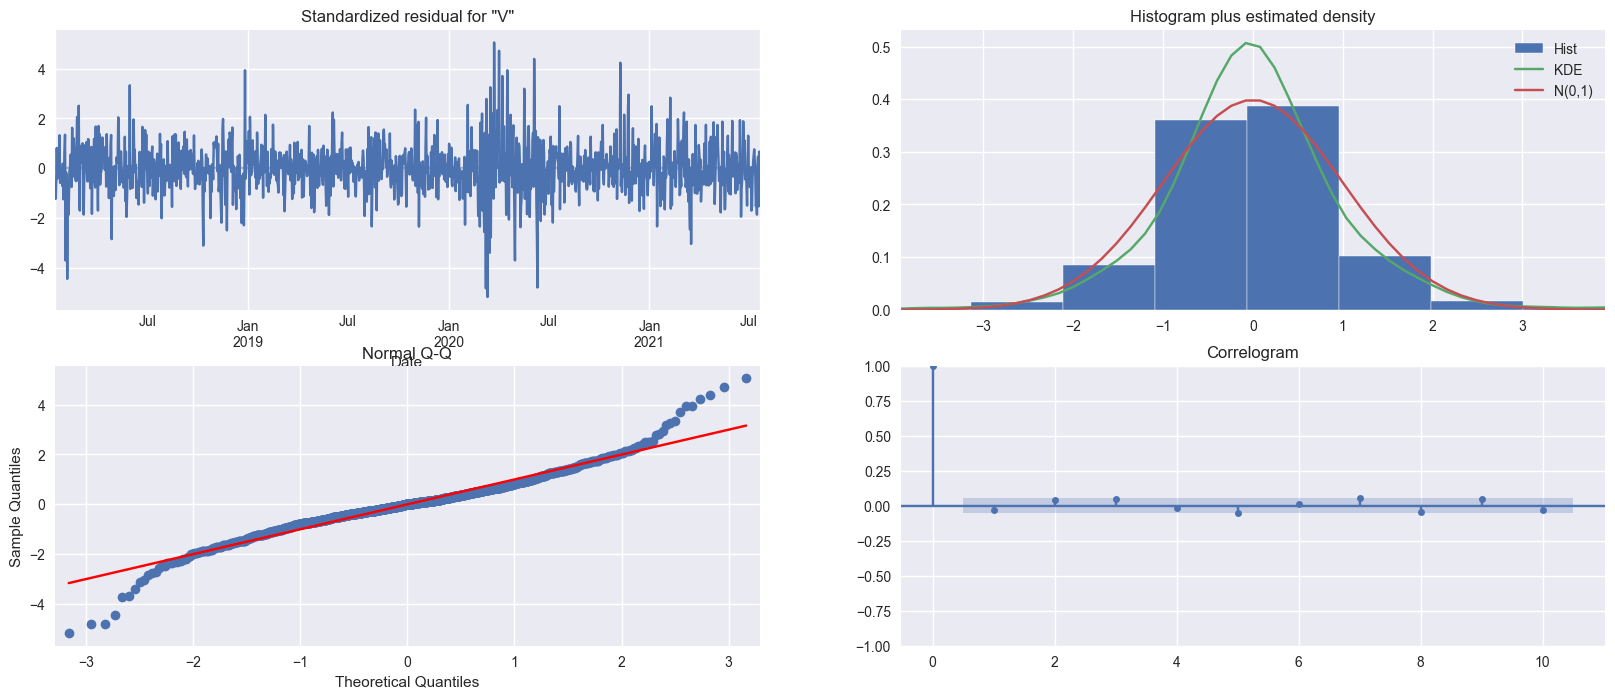

In [36]:
plt.style.use('seaborn')
arima_result.plot_diagnostics(figsize=(20,8))
plt.show()